In [12]:
import spot, buddy
spot.setup()
from IPython.display import display

In [13]:
form = "(G(p1))  -> (G((x&!y)|(y&!x)) & G(F x) & G(F y))"
outs = ["x", "y"]

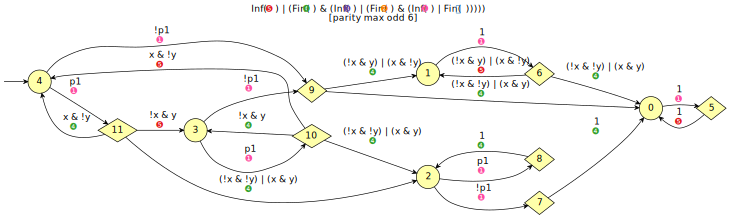

In [14]:
# Create a game arena from the specification
# The "round" states correspond to the environment
# All env states are input complete and deterministic, that each for each assignement to the variables in ins = all_ap\outs
# there exists one compatible outgoing transition
# The "diamond" states are player states.
# The player can choose the edge and any assignement to the outs variables that is compatible with the edge condition
si = spot.synthesis_info() # Options
arena = spot.ltl_to_game(form, outs, si)
arena
# Note that the cycles 2-8 and 0-5 correspond to sink states: 
# The assumption G(p1) is violated -> the controller is allowed to do as it pleases

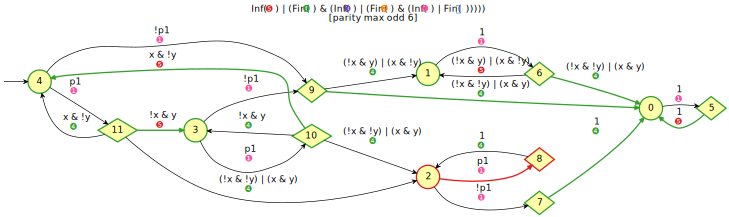

In [15]:
# Solving the game means finding a strategy, a mapping player state -> edge 
# taken such that the restricted arena satisfies the acceptance condition
spot.solve_game(arena, si)
spot.highlight_strategy(arena)
arena

Minimization level:  0


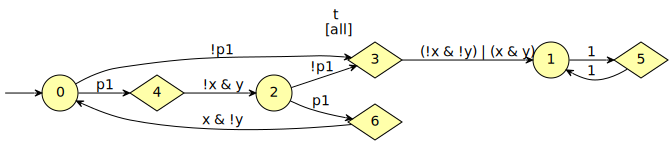

Minimization level:  2


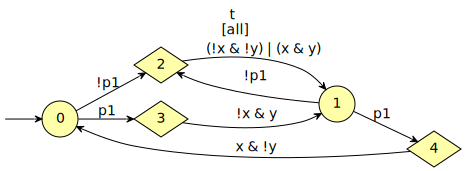

Minimization level:  4


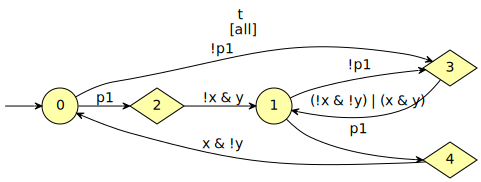

In [19]:
# Now we can apply the strategy to obtain a mealy machine
# Here we choose a "separated" machine, that is we keep the notion of 
# environment and player states.

# We have several optimization levels
# These levels determine if and how to minimize the machine
all_mealy = []
for minlvl in [0, 2, 4]: # 0: No reduction, 2: simulation based reduction with assignement, 3: minimization
    si.minimize_lvl = minlvl
    m = spot.solved_game_to_split_mealy(arena, si)
    print("Minimization level: ", minlvl)
    display(m)
    all_mealy.append(m)